## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
%pip install -U kaleido
# Библиотека для ренера графиков

In [42]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [12]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(4, input_shape=(8,), activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [13]:
from keras.optimizers import SGD
INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [14]:
%%time
EPOCHS = 200
H = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test, Y_test))

Epoch 1/200
17/17 [==============================] - 0s 9ms/step - loss: 12365613541317672960.0000 - mae: 864242688.0000 - val_loss: 28253057229783040.0000 - val_mae: 168086512.0000
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 21031320977145856.0000 - mae: 144354640.0000 - val_loss: 14215164928720896.0000 - val_mae: 119227376.0000
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 10581649439850496.0000 - mae: 102393904.0000 - val_loss: 7152191068438528.0000 - val_mae: 84570632.0000
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 5324027501477888.0000 - mae: 72630272.0000 - val_loss: 3598538348953600.0000 - val_mae: 59987832.0000
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 2678718757601280.0000 - mae: 51518236.0000 - val_loss: 1810557556490240.0000 - val_mae: 42550656.0000
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 1347762348097536.0000 - mae: 36542996.0

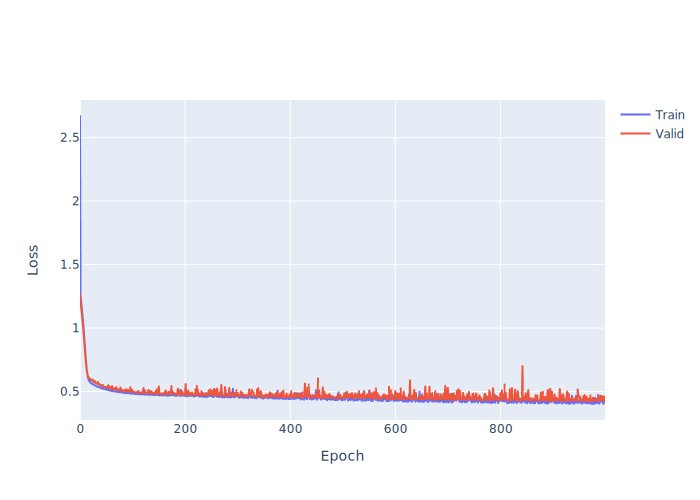

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import kaleido

pio.renderers.default = "svg"

fig = go.Figure()

fig.add_trace(go.Scattergl(y=H.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

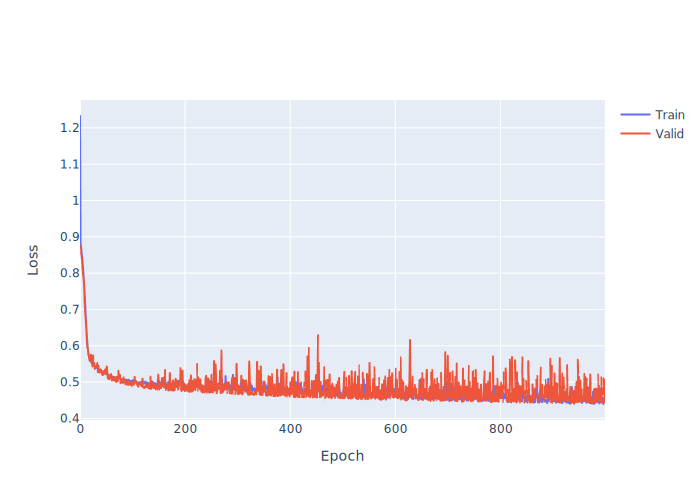

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [19]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 1ms/step
Средняя ошибка: $90722


#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Модель обучается плохо, так как даныне не нормализованны, нормализуем данные, а также добавим дополнительные слои.

In [32]:
from sklearn.preprocessing import MinMaxScaler


model = Sequential([
    Dense(256, input_shape=(8,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Нормализуем данные
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

In [33]:
%%time
EPOCHS = 1000
H = model.fit(X_norm, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test_norm, Y_test))

Epoch 1/1000
17/17 [==============================] - 1s 30ms/step - loss: 2.6705 - mae: 1.2327 - val_loss: 1.2670 - val_mae: 0.8673
Epoch 2/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.2610 - mae: 0.8823 - val_loss: 1.2064 - val_mae: 0.8740
Epoch 3/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.2124 - mae: 0.8729 - val_loss: 1.1665 - val_mae: 0.8582
Epoch 4/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.1706 - mae: 0.8575 - val_loss: 1.1278 - val_mae: 0.8475
Epoch 5/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1287 - mae: 0.8432 - val_loss: 1.0880 - val_mae: 0.8343
Epoch 6/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.0853 - mae: 0.8279 - val_loss: 1.0451 - val_mae: 0.8113
Epoch 7/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.0390 - mae: 0.8089 - val_loss: 1.0001 - val_mae: 0.7942
Epoch 8/1000
17/17 [==============================] - 0s 10ms/step - los

#### 1.6. Сделайте предсказания на тестовых данных

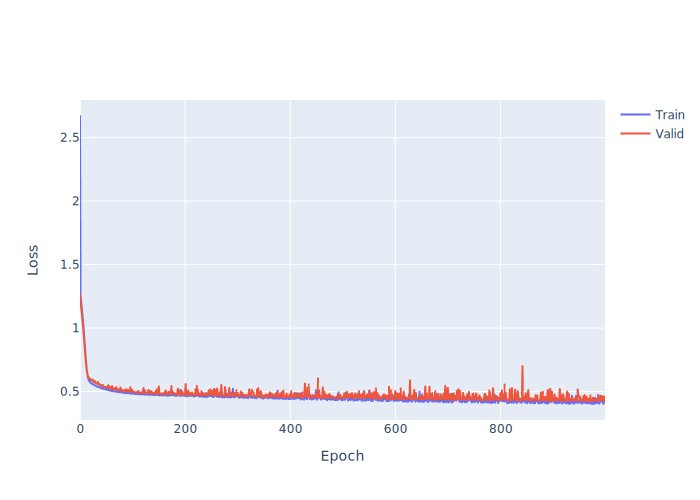

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

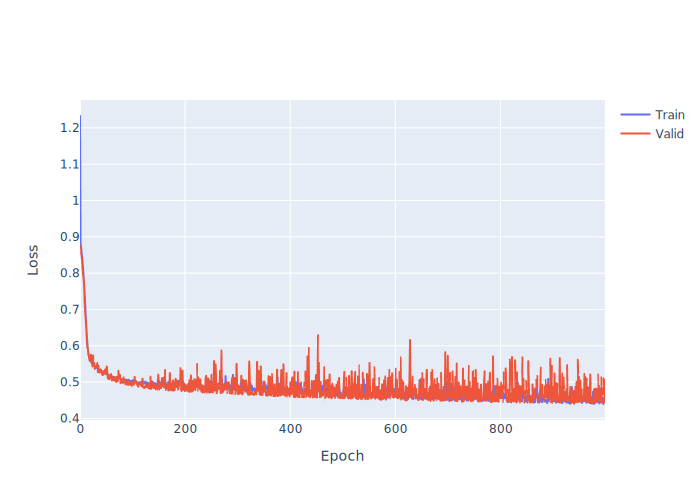

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

#### 1.7. Посчитайте метрику качества на тестовых данных

In [36]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test_norm)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 1ms/step
Средняя ошибка: $44513
